# 6 - Lasso Regression

**Lasso regression is also called Penalized regression method. This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models. Lasso Regularization helps to increase model interpretation.**

**When Lasso Regression shrink some coefficients to zero but Ridge Regression does not shrink**

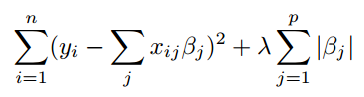

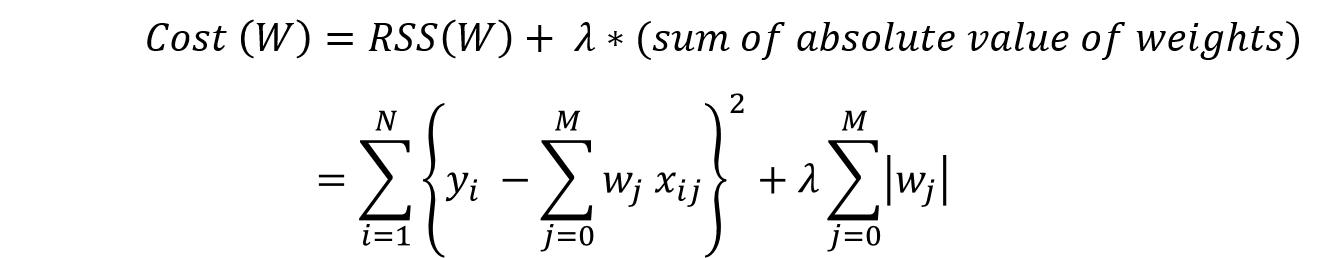

# Get dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Hitters.csv")
data = df.copy()
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [2]:
# Check null values
data.isnull().values.any()

True

In [3]:
# Clear null values
data = data.dropna()
data.isnull().values.any()

False

# Create Dummy Variables

In [4]:
dummies = pd.get_dummies(data[["League","Division","NewLeague"]])
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [5]:
y = data["Salary"]

X_pre = data.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_pre,dummies[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


# Split train and test

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(210, 19)
(210,)
(53, 19)
(53,)


# Import model

In [8]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

lassoModel = Lasso(alpha=0.2).fit(X_train,y_train)

In [9]:
lassoModel.coef_

array([  -2.09925275,    7.72220343,    0.9626498 ,   -1.71059648,
         -1.93806737,    6.73443937,   -6.86718302,   -0.22809737,
          0.26072905,    0.64976508,    1.5375262 ,    0.90906374,
         -0.915616  ,    0.25867268,    0.36882909,   -4.74830038,
         56.35525959, -100.61877181,  -28.6429791 ])

# Prediction

In [10]:
from sklearn.metrics import mean_squared_error

y_pred = lassoModel.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"MSE Test Loss = {mse}")
print(f"RMSE Test Loss = {rmse}")

MSE Test Loss = 78104.62758831348
RMSE Test Loss = 279.4720515334467


In [12]:
# Plot random lambda values
lambda_values = 10**np.linspace(10,-1,100)*0.5

lassoModel = Lasso()
coefficients = []

for i in lambda_values:
    lassoModel.set_params(alpha=i)
    lassoModel.fit(X_train,y_train)
    coefficients.append(lassoModel.coef_)


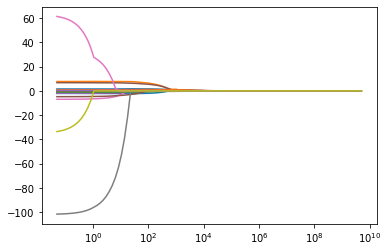

In [13]:
plt.plot(lambda_values,coefficients)
plt.xscale("log")

# Model Tuning

In [16]:
from sklearn.linear_model import LassoCV

lassoCVModel = LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True).fit(X_train,y_train)
print(f"Optimum lambda value = {lassoCVModel.alpha_}")

Optimum lambda value = 0.19911910822934523


# Tuned Model

In [17]:
lassoTunedModel = Lasso(alpha=lassoCVModel.alpha_).fit(X_train,y_train)

# Prediction with tuned model
y_pred_tuned = lassoTunedModel.predict(X_test)

# Find loss values
mse_tuned = mean_squared_error(y_test,y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)

print(f"MSE Tuned Loss Value = {mse_tuned}")
print(f"RMSE Tuned Loss Value = {rmse_tuned}")

MSE Tuned Loss Value = 78104.48728833332
RMSE Tuned Loss Value = 279.4718005243701
